# Load the data


**Notes**

NLP: is not model building

NLP make the raw text ready for model building

In [ ]:
# Pandas is a Python library used for working with data sets.
# It has functions for analyzing, cleaning, exploring, and manipulating data.
# https://www.w3schools.com/python/pandas/pandas_intro.asp

# Why Pandas:
# A convenient and efficient way to load data into a DataFrame
# Automatically infers data types for each column
# It loads only the necessary columns into memory, which is crucial for handling large datasets

import pandas as pd

# The display max length in a cell is 200, any left will display as ...
pd.set_option("display.max_colwidth", 200)

In [ ]:
# Data source: https://www.kaggle.com/datasets/nelgiriyewithana/emotions
# Load the raw data and print the first 5 rows
data = pd.read_csv("/content/emotion.csv")
data["label"] = data["label"].astype(int)
data.head()

,id,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listl...,0
2,2,i gave up my internship with the dmrg and am feeling distraught,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies...,4


In [ ]:
# sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)

**Notes**

Corpus = entire dataset (collection of documents - rows)

Token = a word

Vocabulary = collection of unique tokens from the corpus

In [ ]:
# Check data types and data frame info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      416809 non-null  int64 
 1   text    416809 non-null  object
 2   label   416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [ ]:
# Check again to make sure no null document
data.isnull().sum()

id       0
text     0
label    0
dtype: int64

In [ ]:
# We do not need the id column as it has no meaning to the model
# axis = 0 means drop rows; axis = 1 means drop cols
# inplace = True means modifies the original data frame or returns a new one

data.drop(['id'], axis=1, inplace=True)
data.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listl...,0
2,i gave up my internship with the dmrg and am feeling distraught,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies...,4


In [ ]:
# Check for class balance
# normalize=True, it returns the relative frequencies of each unique value instead of the counts.

data["label"].value_counts(normalize=True)

label
1    0.338445
0    0.290749
3    0.137514
4    0.114470
2    0.082901
5    0.035921
Name: proportion, dtype: float64

**Notes**

I can see here there is no imbalance issues

Imbalance issue happens when 90% of samples belong to a class. Lead to biased model performance, as the model may favor the majority class.

# Data cleaning

## Text Cleaning

In [ ]:
data.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listl...,0
2,i gave up my internship with the dmrg and am feeling distraught,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies...,4


**Notes**

In my data set, some words are written not correctly, that lead to a problem that both stopwords and contractions can not recognize it. Most of the cases that the contractions have '

"didn't" but "didn t"

"don't" but "don t"



In [ ]:
# Using regular expressions lib

import re

Some examples

In [ ]:
# Replace ive with i have
# The ive must be inside \b and \b. Because I only want to replace the ive text that stands alone.
# For example
# ive a dog -> i have a dog
# Not
# i live in sydney -> i li have in sydney

re.sub(r"\bive\b", "i have", data["text"][1])

'i have enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing'

In [ ]:
# Remove any number, special chars "!,.", for emotion detection, these are not pay an important role.
re.sub(r'[^a-zA-Z\s]', '', data["text"][1])

'ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing'

## Stopwords

In [ ]:
# Using lib nltk (Natural Language Toolkit)

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Stop words are non informative words. It has no meaning for emotion detection

nltk_stopwords = set(stopwords.words("english"))
print(nltk_stopwords)

{'any', 'how', 'been', 'does', 'them', 'below', "didn't", 'their', 'more', 'isn', 'once', 'own', 'his', 'only', 'there', 'in', "you're", 'few', 'o', 'having', 'why', 'for', 'but', 'again', 'is', 'herself', 'because', 'has', 'when', 'an', 'all', 'over', 'between', 'too', 'if', "should've", 'by', "it's", 'don', "wouldn't", 'above', 'will', "you'll", 'each', "don't", 'of', "needn't", 'won', 'shouldn', 'further', 'they', 'hasn', 'which', 'most', 'him', 'he', 's', 'with', 'my', 'being', 'did', 'or', "haven't", "couldn't", 'mustn', 'that', 'what', 'hers', 'was', 'shan', 'a', 'until', 'under', 'can', 'himself', 'before', 'off', "shouldn't", 'wouldn', 'y', 'am', 'against', 'had', 'it', 'hadn', 'no', 'into', 'than', 'themselves', 'both', 'myself', 'now', 'we', 'whom', 'needn', 'weren', 'yours', 'ourselves', 'then', 'me', 'these', "that'll", 'who', 'be', 'should', 've', 're', "mustn't", 'were', "she's", 'out', 'll', 'where', 'its', "hasn't", 'do', 'those', 'her', 'so', "shan't", 'have', 'just', 

In [ ]:
# There are 179 stop words from the nltk lib

len(nltk_stopwords)

179

In [ ]:
# There is another lib that provides stop words
# I want to combine the stop words list from both libs

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'any', 'none', 'well', 'them', 'else', 'move', 'below', 'whenever', 'everything', 'twelve', 'more', 'anywhere', 'side', 'once', 'latter', 'own', 'only', 'first', 'there', 'beside', 'serious', 'namely', 'also', 'bottom', 'beforehand', 'for', 'but', 'de', 'again', 'because', 'an', 'among', 'hundred', 'over', 'fifteen', 'inc', 'if', 'by', 'amongst', 'nobody', 'above', 'will', 'several', 'otherwise', 'across', 'behind', 'amount', 'which', 'almost', 'him', 'nothing', 'being', 'name', 'made', 'whatever', 'thru', 'that', 'already', 'fill', 'what', 'throughout', 'a', 'until', 'can', 'without', 'before', 'am', 'it', 'thereby', 'into', 'than', 'get', 'six', 'hereby', 'upon', 'both', 'now', 'thence', 'thick', 'bill', 'whereas', 'neither', 'toward', 'describe', 'yours', 'wherein', 'least', 'me', 'anyway', 'then', 'these', 'around', 'four', 'whoever', 'third', 'enough', 'noone', 'eight', 'everywhere', 're', 'whether', 'someone', 'never', 'out', 'where', 'part', 'three', 'whereupon', 'done', 'even'

In [ ]:
# There are 318 stop words from the sklearn lib

len(sklearn_stopwords)

318

In [ ]:
# Combine stop words lists

domain_stopwords = ["feel", "feeling"]

combine_stopwords = domain_stopwords + list(nltk_stopwords.union(sklearn_stopwords))

len(combine_stopwords)

380

In [ ]:
print(combine_stopwords)

['feel', 'feeling', 'any', 'none', 'well', 'does', 'them', 'else', 'move', 'below', 'whenever', 'everything', 'twelve', 'more', 'isn', 'anywhere', 'side', 'once', 'latter', 'own', 'only', 'first', 'there', 'beside', 'serious', 'namely', 'having', 'also', 'bottom', 'beforehand', 'for', 'but', 'de', 'again', 'because', 'an', 'among', 'hundred', 'over', 'fifteen', 'inc', 'if', "should've", 'by', 'amongst', "wouldn't", 'nobody', 'above', 'will', "you'll", "needn't", 'several', 'otherwise', 'across', 'behind', 'hasn', 'amount', 'which', 'almost', 'him', 'nothing', 'being', "haven't", 'name', 'made', 'whatever', 'thru', "couldn't", 'that', 'already', 'what', 'fill', 'throughout', 'shan', 'a', 'until', 'can', 'without', 'wouldn', 'before', 'am', 'it', 'hadn', 'thereby', 'into', 'than', 'get', 'six', 'hereby', 'upon', 'both', 'now', 'weren', 'thence', 'thick', 'bill', 'whereas', 'neither', 'toward', 'yours', 'describe', 'wherein', 'then', 'me', 'these', 'least', 'anyway', 'around', 'four', "th

## Text Normalization

In [ ]:
# In English, go, going and goes have the same meaning.
# So we want to normalize them into go

# There are two ways: Stemming and Lemmatization (prefer)

# The difference are:
# Stemming only removes prefixes and suffixes by a set of rules, but sometimes it will mess up the words
# Lemmatization will attach a english dictionary to the memory to make sure after normalization it still meaning words

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


For example, images to image

In [ ]:
# Before
data["text"][41]

'i feel about my holiday break from work pagetitle rugmi popular images of the now'

In [ ]:
# After

new_doc = ""

for token in data["text"][41].split():
    new_doc = new_doc + lemmatizer.lemmatize(token.lower()) + " "

new_doc

'i feel about my holiday break from work pagetitle rugmi popular image of the now '

In [ ]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 12.5 MB/s eta 0:00:00


In [ ]:
# In english, people are usually prefer using the short form of words
# For example, it's = it is

import contractions

For example, dunno to do not

In [ ]:
# Before
data["text"][40]

'i dunno i just feel scared to walk in after awhile it got ok but when i walk into this room w poorly erected brick walls separating the room into xm partitions'

In [ ]:
# After
contractions.fix(data["text"][40])

'i do not know i just feel scared to walk in after awhile it got ok but when i walk into this room w poorly erected brick walls separating the room into xm partitions'

## Define the cleaner function

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.corpus import wordnet

# Define function to lemmatize each word with its POS tag
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def text_cleaner(text, removestopwords):
  # As mention before, there are many text "'s" "'t" but " s" " t" so that both stopwords and contractions can not normalize it
  # Begin of custom cleaner
  new_text = re.sub(r"\baren t\b", "are not", text)
  new_text = re.sub(r"\bcan t\b", "can not", new_text)
  new_text = re.sub(r"\bcouldn t\b", "could not", new_text)
  new_text = re.sub(r"\bdidn t\b", "did not", new_text)
  new_text = re.sub(r"\bdon t\b", "do not", new_text)
  new_text = re.sub(r"\bdoesn t\b", "does not", new_text)
  new_text = re.sub(r"\bhadn t\b", "had not", new_text)
  new_text = re.sub(r"\bhasn t\b", "has not", new_text)
  new_text = re.sub(r"\bhaven t\b", "have not", new_text)
  new_text = re.sub(r"\bisn t\b", "is not", new_text)
  new_text = re.sub(r"\bmustn t\b", "must not", new_text)
  new_text = re.sub(r"\bshouldn t\b", "should not", new_text)
  new_text = re.sub(r"\bwasn t\b", "was not", new_text)
  new_text = re.sub(r"\bweren t\b", "were not", new_text)
  new_text = re.sub(r"\bwon t\b", "will not", new_text)
  new_text = re.sub(r"\bwouldn t\b", "would not", new_text)

  new_text = re.sub(r"\bi m\b", "i am", new_text)
  new_text = re.sub(r"\bhe s\b", "he is", new_text)
  new_text = re.sub(r"\bshe s\b", "she is", new_text)
  new_text = re.sub(r"\bit s\b", "it is", new_text)

  new_text = re.sub(r"\byou re\b", "you are", new_text)
  new_text = re.sub(r"\bwe re\b", "we are", new_text)
  new_text = re.sub(r"\bthey re\b", "they are", new_text)

  new_text = re.sub(r"\bi ve\b", "i ve", new_text)
  new_text = re.sub(r"\byou ve\b", "you ve", new_text)
  new_text = re.sub(r"\bwe ve\b", "we ve", new_text)
  new_text = re.sub(r"\bthey ve\b", "they ve", new_text)
  new_text = re.sub(r"\bshould ve\b", "should ve", new_text)
  new_text = re.sub(r"\bcould ve\b", "could ve", new_text)
  new_text = re.sub(r"\bwould ve\b", "would ve", new_text)

  new_text = re.sub(r"\bi ll\b", "i will", new_text)
  new_text = re.sub(r"\byou ll\b", "you will", new_text)
  new_text = re.sub(r"\bhe ll\b", "he will", new_text)
  new_text = re.sub(r"\bshe ll\b", "she will", new_text)
  new_text = re.sub(r"\bit ll\b", "it will", new_text)
  new_text = re.sub(r"\bwe ll\b", "we will", new_text)
  new_text = re.sub(r"\bthey ll\b", "they will", new_text)

  new_text = re.sub(r"\bi d\b", "i would", new_text)
  new_text = re.sub(r"\byou d\b", "you would", new_text)
  new_text = re.sub(r"\bhe d\b", "he would", new_text)
  new_text = re.sub(r"\bshe d\b", "she would", new_text)
  new_text = re.sub(r"\bwe d\b", "we would", new_text)
  new_text = re.sub(r"\bthey d\b", "they would", new_text)

  new_text = re.sub(r"\bhere s\b", "here is", new_text)
  new_text = re.sub(r"\bthere s\b", "there is", new_text)
  new_text = re.sub(r"\bthat s\b", "that is", new_text)
  new_text = re.sub(r"\bthat d\b", "that would", new_text)
  new_text = re.sub(r"\bthis ll\b", "this will", new_text)
  new_text = re.sub(r"\bthat ll\b", "that will", new_text)
  new_text = re.sub(r"\bwhat s\b", "what is", new_text)
  new_text = re.sub(r"\bwhere s\b", "where is", new_text)
  new_text = re.sub(r"\bwhere d\b", "where did", new_text)
  new_text = re.sub(r"\bwho s\b", "who is", new_text)
  new_text = re.sub(r"\bwhen s\b", "when is", new_text)
  new_text = re.sub(r"\bhow s\b", "how is", new_text)
  new_text = re.sub(r"\bhow d\b", "how would", new_text)
  new_text = re.sub(r"\bwhy s\b", "why is", new_text)
  new_text = re.sub(r"\bwhy d\b", "why did", new_text)
  new_text = re.sub(r"\blet s\b", "let", new_text)
  # End of custom cleaner

  # Contractions
  new_text = contractions.fix(new_text)

  # Chars and space only
  new_text = re.sub(r'[^a-zA-Z\s]', '', new_text)

  # Remove begin & last spaces
  new_text = new_text.lower().strip()

  # Remove stopwords
  if (removestopwords):
    temp_text = ""
    for token in new_text.split():
       if token not in combine_stopwords:
         temp_text = temp_text + token + " "

    new_text = temp_text

  # Split and tag the token
  pos_tagged = nltk.pos_tag(nltk.word_tokenize(new_text))
  wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))

  cleaned_text = ""

  for token, tag in wordnet_tagged:
      if tag is None:
        # if there is no available tag, append the token as is
        cleaned_text = cleaned_text + token + " "
      else:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token, tag) + " "

  return cleaned_text

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


We need to do this because the size of the vocab will be the size of features.

And we do not want non meaning words to be consider as features.

This cleaned text took 10mins to run

In [ ]:
cleaned_text=[]
for text in data["text"]:
  cleaned_text.append(text_cleaner(text, True))

In [ ]:
data['cleaned_text'] = cleaned_text
data.head()

,text,label,cleaned_text
0,i just feel really helpless and heavy hearted,4,really helpless heavy hearted
1,ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listl...,0,enjoy able slouch relax unwind frankly need week end uni expo lately start bit listless really good thing
2,i gave up my internship with the dmrg and am feeling distraught,4,give internship dmrg distraught
3,i dont know i feel so lost,0,know lose
4,i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies...,4,kindergarten teacher thoroughly weary job take university entrance exam suffer anxiety week want carry work study alternative


In [ ]:
# After cleaned there are some NaN in the cleaned_text
data = data.dropna()
data.to_csv("emotion_cleaned.csv", index=False)

# Data Visualization

In [ ]:
# All words before cleaned
all_words = []

for t in data["text"]:
  all_words.extend(t.split())

# number of unique words in the whole corpus
len(set(all_words))

75302

So in 416809 entries we have 75302 unique words

In [ ]:
# import lib for diagram

import matplotlib.pyplot as plt

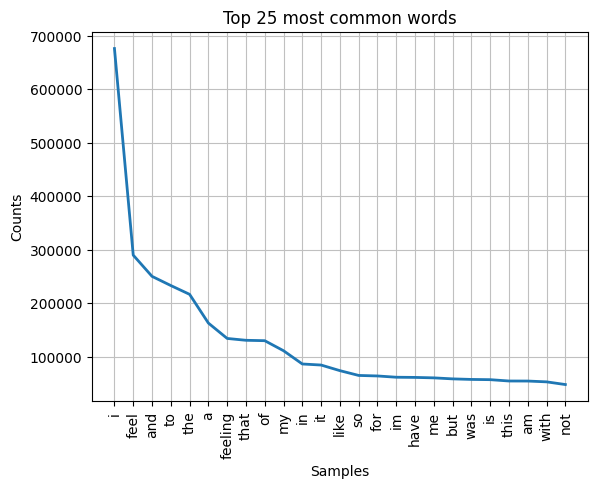

In [ ]:
# frequency distribution
freq_dist = nltk.FreqDist(all_words)

plt.title("Top 25 most common words")

freq_dist.plot(25, cumulative=False)

plt.show()

In [ ]:
# All cleaned words without stopwords
all_cleaned_words = []

for t in data["cleaned_text"]:
  all_cleaned_words.extend(t.split())

# number of unique words in the whole corpus
len(set(all_cleaned_words))

65652

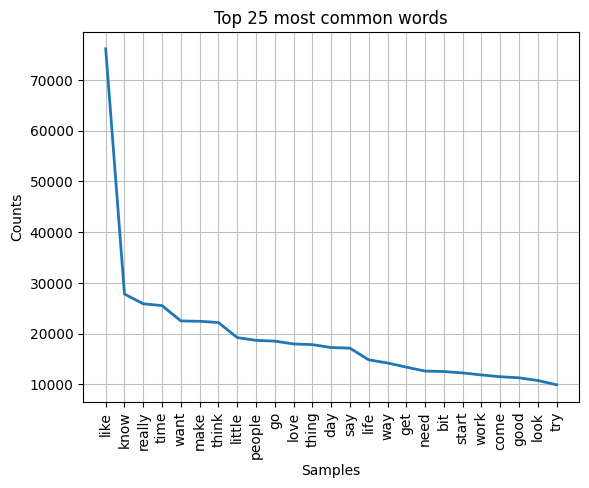

In [ ]:
# frequency distribution
freq_dist = nltk.FreqDist(all_cleaned_words)

plt.title("Top 25 most common words")

freq_dist.plot(25, cumulative=False)

plt.show()

now we can see some valuable words to detect emotions

# Load cleaned text

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)

data = pd.read_csv("/content/emotion_cleaned.csv")
data["label"] = data["label"].astype(int)
data.head(30)

,text,label,cleaned_text
0,i just feel really helpless and heavy hearted,4,really helpless heavy hearted
1,ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listl...,0,enjoy able slouch relax unwind frankly need week end uni expo lately start bit listless really good thing
2,i gave up my internship with the dmrg and am feeling distraught,4,give internship dmrg distraught
3,i dont know i feel so lost,0,know lose
4,i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies...,4,kindergarten teacher thoroughly weary job take university entrance exam suffer anxiety week want carry work study alternative
5,i was beginning to feel quite disheartened,0,begin quite dishearten
6,i would think that whomever would be lucky enough to stay in this suite must feel like it is the most romantic place on earth,2,think whomever lucky stay suite like romantic place earth
7,i fear that they won t ever feel that delicious excitement of christmas eve at least not in the same way i remember doing it,1,fear delicious excitement christmas eve way remember
8,im forever taking some time out to have a lie down because i feel weird,5,forever take time lie weird
9,i can still lose the weight without feeling deprived,0,lose weight deprive


# Bag of Words Model - Feature Extraction

Problems:
- High Sparsity of the feature matrix
- High Dimensionality
- The ordering of the words is lost - loss of context, no semantic relation between words

Solutions:
- Use max_df and max_features to narrow down to few useful features
- Use TruncatedSVD for Dimensionality Reduction
- N-gram. But Word Embeddings is better.

## Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvector = CountVectorizer() # Will count the number of time that a word from the vocab present in a document

features = countvector.fit_transform(data["cleaned_text"])

features.shape

(416519, 65628)

In [ ]:
416809 * 64845 # 27 Bilion of cells, and I guest 99.99% of it are zeros

27027979605

In [ ]:
# the matrix is too big to visualize, out of RAM
# but most of its are zero
# below is just one row
pd.DataFrame(features[:10].todense())

,0,1,2,3,4,5,6,7,8,9,...,65618,65619,65620,65621,65622,65623,65624,65625,65626,65627
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
countvector.get_feature_names_out()[:100]

array(['aa', 'aaa', 'aaaa', 'aaaaaaaaaaaaaaaaggghhhh',
       'aaaaaaaaaaaaaaarrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrggggggggggggggggggggggggggggghhhhhhhhhhhhhh',
       'aaaaaaaall', 'aaaaaaand', 'aaaaaand', 'aaaaah', 'aaaaahhhhhh',
       'aaaaall', 'aaaaand', 'aaaah', 'aaaahhhhhh', 'aaaand', 'aaah',
       'aaahs', 'aaand', 'aaargh', 'aaawesome', 'aab', 'aabsolutely',
       'aac', 'aacc', 'aactually', 'aad', 'aadmi', 'aah', 'aahhh',
       'aahhing', 'aainaa', 'aaishwaryaa', 'aajao', 'aakash', 'aakhri',
       'aal', 'aaliyah', 'aallll', 'aam', 'aand', 'aap', 'aaradhya',
       'aardvark', 'aardvarkartglass', 'aaron', 'aarrggh', 'aart',
       'aarthi', 'aaryn', 'aashiqui', 'aate', 'aatp', 'aau', 'ab', 'aba',
       'aback', 'abad', 'abaddon', 'abagail', 'abah', 'abandoment',
       'abandon', 'abandonded', 'abandoned', 'abandoning', 'abandonment',
       'abandonned', 'abandonship', 'abang', 'abani', 'abash', 'abashed',
       'abashedly', 'abate', 'abaya', 'abb', 'abba', 'abbas', 'abba

### Model Building

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, data["label"], test_size=0.2, stratify=data['label'], random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train,y_train)

print(LR.score(X_train,y_train))
print(LR.score(X_test,y_test))

0.9117086565730834
0.8764164986075098


overfitted 91 on train but 87 on test

In [ ]:
LR1 = LogisticRegression(class_weight="balanced",solver='liblinear', penalty="l1", C=0.5)
LR1.fit(X_train,y_train)

print(LR1.score(X_train,y_train))
print(LR1.score(X_test,y_test))

0.8981108293444172
0.8907735522904062


best model, just 0.8 difference

In [ ]:
LR2 = LogisticRegression(class_weight="balanced",solver='liblinear', penalty="l2", C=0.4)
LR2.fit(X_train,y_train)

print(LR2.score(X_train,y_train))
print(LR2.score(X_test,y_test))

0.9031946340951038
0.884303274752713


not good as the above model

#### Hyper parameters tuning of a model

In [ ]:
from sklearn.model_selection import GridSearchCV

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(C=0.5, class_weight='balanced',
                                          penalty='l1', solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [ ]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 0.45001}, 0.8913459163361223, 9)

In [ ]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

89.13459163361223

In [ ]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100

89.72598958081966

In [ ]:
grid_results.cv_results_['std_test_score'][grid_results.best_index_]*100

0.06575758234214785

In [ ]:
grid_results.cv_results_['mean_test_score']

array([0.29074948, 0.88273766, 0.88666032, 0.88886756, 0.89001677,
       0.89067175, 0.89093326, 0.89117797, 0.89128354, 0.89134592,
       0.89123555, 0.89098604, 0.89077251, 0.89067654, 0.89037425,
       0.89007675, 0.88977205, 0.88945056, 0.88912667, 0.88887956])

In [ ]:
grid_results.cv_results_['mean_train_score']

array([0.29074948, 0.88371352, 0.88841712, 0.89107361, 0.89280102,
       0.89398801, 0.89496148, 0.89581979, 0.89652995, 0.8972599 ,
       0.89787469, 0.89850927, 0.89910726, 0.89966687, 0.90022768,
       0.90080409, 0.9013487 , 0.9019437 , 0.90243673, 0.90298554])

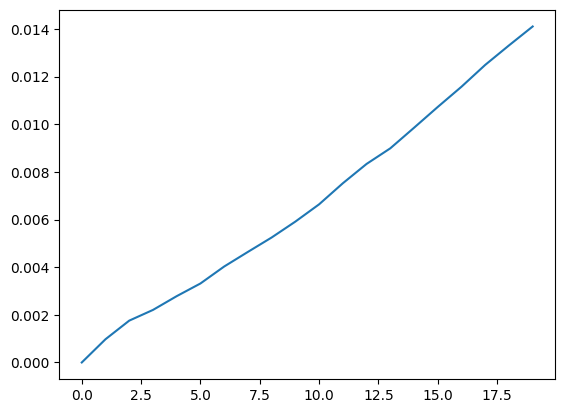

In [ ]:
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])

In [ ]:
grid_results.param_grid

{'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
        2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
        5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
        7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])}

In [ ]:
grid_results.param_grid['C'][3]

0.15001000000000003

In [ ]:
grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score']

array([4.51677584e-12, 9.75866284e-04, 1.75679928e-03, 2.20604545e-03,
       2.78424840e-03, 3.31626677e-03, 4.02822365e-03, 4.64181428e-03,
       5.24640773e-03, 5.91397947e-03, 6.63913233e-03, 7.52323015e-03,
       8.33475314e-03, 8.99033008e-03, 9.85343550e-03, 1.07273369e-02,
       1.15766465e-02, 1.24931337e-02, 1.33100547e-02, 1.41059830e-02])

### Cross Validation

In [ ]:
# Cross-Validate
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [ ]:
import numpy as np

X = features
y = data["label"]

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring="accuracy")
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

[0.89255018 0.89251416 0.88899693 0.89024537 0.89197268]
89.13 0.14


cross validation to make sure that LR1 still the best model, accuracy is 89.12% +/- 0.14%

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR1, X, y, cv=kfold, scoring="accuracy", return_train_score=True)

results

{'fit_time': array([16.0355463 , 14.70435429, 15.08504748, 14.82551003, 14.26492524]),
 'score_time': array([0.02757192, 0.01781535, 0.01842189, 0.01838684, 0.01899838]),
 'test_score': array([0.89253817, 0.89253817, 0.88900893, 0.89023336, 0.89196067]),
 'train_score': array([0.8980388 , 0.8980178 , 0.89894513, 0.89836292, 0.89813814])}

In [ ]:
print(results["train_score"])
print(np.round((results["train_score"].mean())*100, 2), np.round((results["train_score"].std())*100, 2))

[0.8980388  0.8980178  0.89894513 0.89836292 0.89813814]
89.83 0.03


In [ ]:
print(results["test_score"])
print(np.round((results["test_score"].mean())*100, 2), np.round((results["test_score"].std())*100, 2))

[0.89253817 0.89253817 0.88900893 0.89023336 0.89196067]
89.13 0.14


everything good

### Pipeline the process

From LR1 above now we make pipelines

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_text']
y = data['label']

CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5)

CV_pipe1 = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe1, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

CV_pipe1.fit(X,y)
len(CV_pipe1['CV'].vocabulary_)

89.13 0.14


65628

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_text']
y = data['label']

CV = CountVectorizer(min_df=10, max_features=None)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5)

CV_pipe2 = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe2, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

CV_pipe2.fit(X,y)
len(CV_pipe2['CV'].vocabulary_)

89.12 0.14


11734

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_text']
y = data['label']

CV = CountVectorizer(min_df=10, max_features=10000)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5)

CV_pipe3 = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe3, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

CV_pipe3.fit(X,y)
len(CV_pipe3['CV'].vocabulary_)

89.12 0.14


10000

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.naive_bayes import MultinomialNB

X = data['cleaned_text']
y = data['label']

CV = CountVectorizer(min_df=10, max_features=None)
NB = MultinomialNB()

CV_pipe4 = Pipeline([('CV', CV) , ('NB', NB)] )

results = cross_val_score(CV_pipe4, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

CV_pipe4.fit(X,y)
len(CV_pipe4['CV'].vocabulary_)

86.65 0.15


11734

In [ ]:
# export models
import pickle

with open(r'CV_NB_pipeline.pickle', 'wb') as handle:
  pickle.dump(CV_pipe4, handle, protocol=pickle.HIGHEST_PROTOCOL)

**Discussion:**

From the above performance, I will choose CV_pipe3 for deloyment

As it is slightly low in accuracy 0.01% but using less words in the vocab

In [ ]:
tt = ["i have a good grade"]
print(CV_pipe1.predict(tt))
print(CV_pipe2.predict(tt))
print(CV_pipe3.predict(tt))

[1]
[1]
[1]


In [ ]:
# export models
import pickle

with open(r'CV_LR_pipeline_full.pickle', 'wb') as handle:
  pickle.dump(CV_pipe1, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(r'CV_LR_pipeline_10k.pickle', 'wb') as handle:
  pickle.dump(CV_pipe3, handle, protocol=pickle.HIGHEST_PROTOCOL)

### N-gram Model

In [ ]:
# Unigrams + Bigrams
X = data['cleaned_text']
y = data['label']

CV = CountVectorizer(ngram_range=(1, 2), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5)
CV_pipe4 = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe4, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

CV.fit_transform(X)
len(CV.vocabulary_)

90.29 0.03
89.28 0.12


86814

In [ ]:
# export models
import pickle

with open(r'CV_LR_pipeline_n_grams.pickle', 'wb') as handle:
  pickle.dump(CV_pipe4, handle, protocol=pickle.HIGHEST_PROTOCOL)

## TF-IDF Vectorizer

In [ ]:
# TF_score = how many times a word (from the vocab) is appearing in a given doc / total no. of words in that doc
# TF(today | doc2) = 2/5
# TF_score will be high for "very frequent" words in a given doc

# IDF_score = log( (1+Total no. of documents) / (1+No. of documents contianing that "term") )
# IDF_score penalizes those those words which are EQUALLY frequent in almost all the documents

# TF_IDF score = TF_score*IDF_score

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['cleaned_text']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
TFIDF = TfidfVectorizer(min_df=5, max_features=None)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5)
TFIDF_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )
results = cross_validate(TFIDF_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)

89.62 0.03
89.24 0.12


17535

In [ ]:
with open(r'TFIDF_LR_pipeline_full.pickle', 'wb') as handle:
  pickle.dump(TFIDF_pipe, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Word Embeddings

Word Embeddings uses word_vectors which are dense representations - no 0 number

The dimensionality of the feature set is limited by the size of the word embeddings - MAX 300 vector_size which the developer will decide. Different with the above two vectors where the vocab_size is the vector_size

Three popular pre-build WE:
- Word2Vec Models: gives the context of each word in a given document
- GloVe Models: gives the context of each word in the entire corpus
- FastText encode characters instead of words



In [ ]:
pip install gensim

### Build from the data

In [ ]:
text_list = list(data['cleaned_text'].apply(lambda x: x.split()))
text_list[0]

['really', 'helpless', 'heavy', 'hearted']

In [ ]:
from gensim.models import Word2Vec
# train model
cbow_model = Word2Vec(text_list, vector_size = 100, window = 3, min_count=5, sg=0)

In [ ]:
# Num of vocab
len(cbow_model.wv.index_to_key)

17783

In [ ]:
# Each document vector will have dimension [1 x 200]
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""

    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in cbow_model.wv.index_to_key]

    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(cbow_model.wv.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean


In [ ]:
# this contains some NaN value
text_temp = data['cleaned_text'].apply(document_vector)

<ipython-input-5-fabb2f2c7792>:12: RuntimeWarning: Mean of empty slice.
  wv1_mean = wv1_.mean(axis=0)


In [ ]:
np.where(pd.isnull(text_temp))

(array([ 13887,  22507,  48789,  51533,  64871, 109213, 113319, 163163,
        175116, 185586, 206668, 207105, 222143, 227492, 238224, 244903,
        247093, 371696, 374128]),)

In [ ]:
text_temp[13887]

nan

In [ ]:
text_temp[:5]

0    [-0.15185456, 0.117051676, 0.47263235, 0.13816965, 0.4627935, -0.09650575, 0.25585082, 0.30824926, -0.21503821, 0.16847125, -0.35541308, -0.7285992, 0.017626682, -0.16740116, 0.09735915, -0.170802...
1    [-0.14669414, 0.22120431, 0.431243, -0.05068932, -0.03768524, -0.40879324, 0.28984985, 0.5149234, 0.43455118, -0.05840901, -0.08792387, -0.21289723, -0.018032806, 0.04146565, 0.15615994, -0.386156...
2    [-0.03794523, -0.13293152, 0.23744665, 0.32069376, 0.32136783, -0.3993417, 0.0002593994, -0.067071594, 0.1325474, -0.20881225, -0.49721813, -0.48309693, -0.14970727, -0.10741082, -0.24151643, -0.3...
3    [-0.80178654, -0.439791, 1.6683531, 0.31475377, 0.29651833, -0.44596446, 0.6141461, 0.1553777, -0.2542143, 0.08419252, -0.38771003, -0.6885016, -0.50545883, -0.26340243, -0.054581422, 0.37610087, ...
4    [-0.16256545, 0.05703211, 0.4279797, 0.14398435, 0.23361695, -0.75867206, -0.11936466, 0.09637068, 0.29838604, 0.123865366, -0.37800303, -0.25471663, -0.31091136, -0.13491793,

In [ ]:
text_temp[0].shape

(100,)

In [ ]:
# Combining all the document vectors into a singl numpy array
embedding_size = 100
text_vec = np.ones((len(text_temp), embedding_size))*np.nan
for i in range(text_vec.shape[0]):
    text_vec[i,:] = text_temp.iloc[i]

text_vec.shape # this itself is the final FEATURE MATRIX

(416519, 100)

In [ ]:
# Create a new DF to store these new documnent features
df = pd.DataFrame(text_vec)
df['y'] = data['label']
df.dropna(how='any', axis=0, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,y
0,-0.151855,0.117052,0.472632,0.138170,0.462793,-0.096506,0.255851,0.308249,-0.215038,0.168471,...,0.252512,0.122625,0.040191,-0.010650,0.166620,-0.054928,-0.213085,0.368046,-0.112545,4
1,-0.146694,0.221204,0.431243,-0.050689,-0.037685,-0.408793,0.289850,0.514923,0.434551,-0.058409,...,-0.300776,0.119319,0.105568,0.829350,0.113963,0.021717,-0.178327,-0.328783,0.018150,0
2,-0.037945,-0.132932,0.237447,0.320694,0.321368,-0.399342,0.000259,-0.067072,0.132547,-0.208812,...,0.187926,0.074755,0.088322,0.333985,0.238788,-0.138343,-0.369473,-0.426753,-0.040187,4
3,-0.801787,-0.439791,1.668353,0.314754,0.296518,-0.445964,0.614146,0.155378,-0.254214,0.084193,...,0.059346,0.457440,0.558102,0.172011,-0.711356,-0.499795,-1.433443,-0.583325,-0.251852,0
4,-0.162565,0.057032,0.427980,0.143984,0.233617,-0.758672,-0.119365,0.096371,0.298386,0.123865,...,-0.221199,0.248493,0.352681,0.984194,0.426188,0.232135,-0.338509,-0.614526,-0.235175,4


In [ ]:
X_word_emb = df.drop('y', axis=1)
y = df['y']
X_word_emb.shape

(416500, 100)

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5, random_state=42)
WE_pipe1 = Pipeline([('SC', StandardScaler()), ('LR', LR1)] )

results = cross_validate(WE_pipe1, X_word_emb, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))


66.45 0.04
66.4 0.16


In [ ]:
import pickle

with open(r'WE_LR_pipeline_self_built.pickle', 'wb') as handle:
  pickle.dump(WE_pipe1, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Pre-built

Link: https://nlp.stanford.edu/projects/glove/


In [ ]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# convert glove to word2vec format
glove2word2vec('/content/drive/MyDrive/glove.6B.100d.txt', 'word2vec.txt')

<ipython-input-16-626262c8f4a7>:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec('/content/drive/MyDrive/glove.6B.100d.txt', 'word2vec.txt')


(400000, 100)

In [ ]:
# load the converted model
filename = 'word2vec.txt'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698540687561035)]


In [ ]:
# Finding the odd one out.
print(model.doesnt_match('breakfast cereal dinner lunch'.split()))

cereal


In [ ]:
#Checking how similarity works.
print(model.similarity('strawberry', 'mango'))
print(model.similarity('book', 'mango'))

0.55659294
0.08692091


In [ ]:
def document_vector_glove(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""

    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in model.index_to_key]

    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(model.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean

In [ ]:
text_temp = data['cleaned_text'].apply(document_vector_glove)

<ipython-input-42-ca7d899f84f1>:11: RuntimeWarning: Mean of empty slice.
  wv1_mean = wv1_.mean(axis=0)


In [ ]:
# Combining all the document vectors into a singl numpy array
embedding_size = 100
text_vec = np.ones((len(text_temp), embedding_size))*np.nan
for i in range(text_vec.shape[0]):
    text_vec[i,:] = text_temp.iloc[i]

df1 = pd.DataFrame(text_vec)
df1['y'] = data['label']
df1.dropna(how='any', axis=0, inplace=True)

X_word_emb = df1.drop('y', axis=1)
y = df1['y']
X_word_emb.shape

(416488, 100)

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4, random_state=42)
WE_pipe2 = Pipeline([('SC', StandardScaler()), ('LR', LR1)] )

results = cross_validate(WE_pipe2, X_word_emb, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

57.44 0.03
57.39 0.17


In [ ]:
import pickle

with open(r'WE_LR_pipeline_pre_built.pickle', 'wb') as handle:
  pickle.dump(WE_pipe2, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Deep Learning

## OHE - Binary features
Making my own Count Vectorizer same as Bag of words

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
import keras.backend as K

In [ ]:
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(64, input_shape=(n_words,), activation='relu', kernel_regularizer='l2'))
#     model.add(Dropout(0.25))
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
#     model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], )

    # summarize defined model
    model.summary()
    return model

In [ ]:
# evaluate a neural network model
def evaluate_model(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 5
    n_words = Xtest.shape[1]

    for i in range(n_repeats):
        # define network
        model = define_model(n_words)

        # fit network
        model.fit(Xtrain, ytrain, epochs=10, verbose=0)

        # evaluate
        _, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)

        print('%d accuracy: %s' % ((i+1), acc))
    return scores

In [ ]:
# fit a tokenizer
from keras.preprocessing.text import Tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [ ]:
# I ran the code in free Google Colab so I only have 12GB RAM, I can not run the whole dataset
import random

def random_sampling(data, sample_size):
  sampled_indices = random.sample(range(len(data)), sample_size)
  return data.iloc[sampled_indices]

new_data = random_sampling(data, 20000)

new_data["label"].value_counts(normalize=True)


label
1    0.34115
0    0.28810
3    0.14195
4    0.11430
2    0.08020
5    0.03430
Name: proportion, dtype: float64

In [ ]:
# create the tokenizer
train_docs = new_data['cleaned_text']
tokenizer = create_tokenizer(train_docs)

In [ ]:
# encode data
X = tokenizer.texts_to_matrix(train_docs, mode='binary')

In [ ]:
X.shape

(20000, 13738)

In [ ]:
X[0]

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
y = new_data['label']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,  test_size=0.2,random_state=42)

In [ ]:
Xtrain.shape, Xtest.shape

((16000, 13738), (4000, 13738))

In [ ]:
# define network
K.clear_session()
n_words = Xtrain.shape[1]
model = define_model(n_words)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                879296    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 881409 (3.36 MB)
Trainable params: 881409 (3.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit network
checkpoint = ModelCheckpoint("DL_OHE.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
callbacks = [checkpoint]

h = model.fit(Xtrain, ytrain, validation_split=0.1, callbacks = callbacks, batch_size=180, epochs=25, verbose=2)

Epoch 1/25

Epoch 1: val_loss improved from inf to -3.32723, saving model to DL_OHE.h5
80/80 - 4s - loss: -4.5918e-01 - accuracy: 0.3381 - val_loss: -3.3272e+00 - val_accuracy: 0.3438 - 4s/epoch - 47ms/step
Epoch 2/25


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from -3.32723 to -26.92775, saving model to DL_OHE.h5
80/80 - 1s - loss: -1.3273e+01 - accuracy: 0.3382 - val_loss: -2.6928e+01 - val_accuracy: 0.3438 - 615ms/epoch - 8ms/step
Epoch 3/25

Epoch 3: val_loss improved from -26.92775 to -101.85076, saving model to DL_OHE.h5
80/80 - 1s - loss: -6.4623e+01 - accuracy: 0.3382 - val_loss: -1.0185e+02 - val_accuracy: 0.3438 - 634ms/epoch - 8ms/step
Epoch 4/25

Epoch 4: val_loss improved from -101.85076 to -262.69666, saving model to DL_OHE.h5
80/80 - 1s - loss: -1.9341e+02 - accuracy: 0.3382 - val_loss: -2.6270e+02 - val_accuracy: 0.3438 - 630ms/epoch - 8ms/step
Epoch 5/25

Epoch 5: val_loss improved from -262.69666 to -539.82990, saving model to DL_OHE.h5
80/80 - 1s - loss: -4.3637e+02 - accuracy: 0.3382 - val_loss: -5.3983e+02 - val_accuracy: 0.3438 - 611ms/epoch - 8ms/step
Epoch 6/25

Epoch 6: val_loss improved from -539.82990 to -958.25000, saving model to DL_OHE.h5
80/80 - 1s - loss: -8.3217e+02 - accuracy: 0.33

Text(0, 0.5, 'Loss Fn valaues')

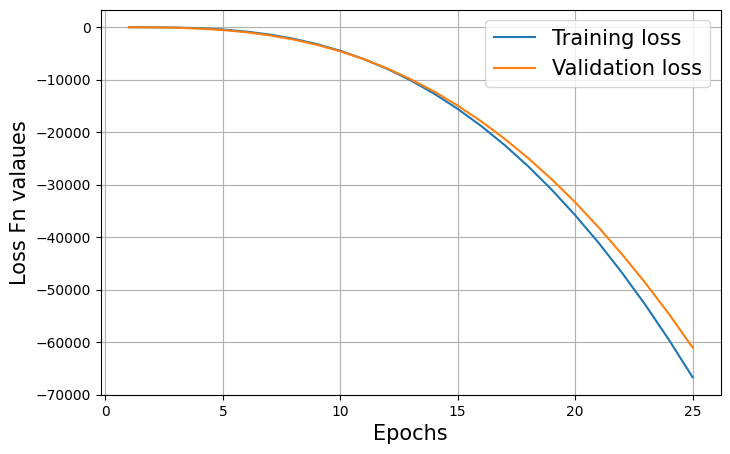

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,26)), h.history['loss'], label='Training loss')
plt.plot(list(range(1,26)), h.history['val_loss'], label='Validation loss')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss Fn valaues', fontsize=15)

Text(0, 0.5, 'Accuracy')

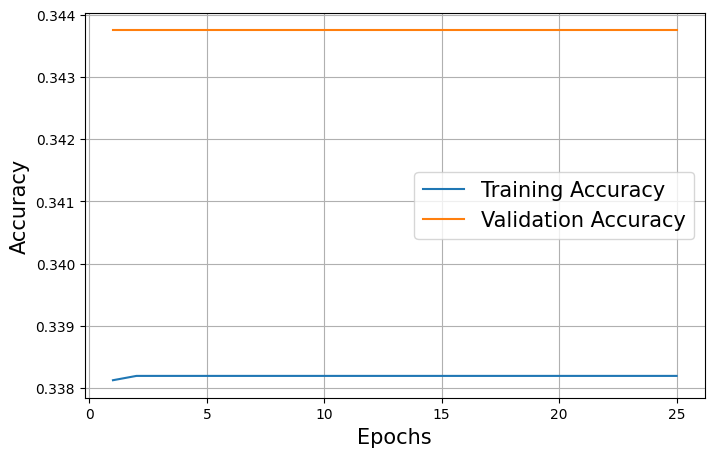

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,26)), h.history['accuracy'], label='Training Accuracy')
plt.plot(list(range(1,26)), h.history['val_accuracy'], label='Validation Accuracy')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

In [ ]:
# evaluate the model ONCe on the test set
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 33.625001


In [ ]:
# evaluate (Train & Test repeated 5 times)
res = evaluate_model(Xtrain, ytrain, Xtest, ytest)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                879296    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 881409 (3.36 MB)
Trainable params: 881409 (3.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1 accuracy: 0.3362500071525574
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                879296    
                               

In [ ]:
import pickle

with open(r'tokenizer-OHE.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Word Embeding Model with Keras Embeding Layer

In [ ]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 761.3 kB/s eta 0:00:00


In [ ]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from sklearn.model_selection import train_test_split
import keras.backend as K

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(new_data['cleaned_text'], new_data['label'],  test_size=0.2, random_state=42)

In [ ]:
Xtrain.shape

(16000,)

In [ ]:
# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
    # integer encode
    encoded = tokenizer.texts_to_sequences(docs)

    # pad sequences
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

In [ ]:
# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)

# calculate the maximum sequence length
max_length = max([len(s.split()) for s in train_docs])
print('Maximum length: %d' % max_length)

Vocabulary size: 13738
Maximum length: 34


In [ ]:
tokenizer = create_tokenizer(Xtrain)
padded_docs_train = encode_docs(tokenizer, max_length, Xtrain)
padded_docs_train

array([[ 205,    0,    0, ...,    0,    0,    0],
       [  45, 5703,  101, ...,    0,    0,    0],
       [ 344,    2,  159, ...,    0,    0,    0],
       ...,
       [ 201,  186,  109, ...,    0,    0,    0],
       [ 758,  172,   86, ...,    0,    0,    0],
       [  23,  294,  893, ...,    0,    0,    0]], dtype=int32)

In [ ]:
padded_docs_train.shape

(16000, 34)

In [ ]:
tokenizer = create_tokenizer(Xtest)
padded_docs_test = encode_docs(tokenizer, max_length, Xtest)
padded_docs_test.shape

(4000, 34)

In [ ]:
# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 300, input_length=max_length))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu')) # this layer does feature extraction from the text
    model.add(MaxPooling1D(pool_size=2)) # this layer concentrates to more imp. features

    model.add(Conv1D(filters=64, kernel_size=8, activation='relu')) # this layer does feature extraction from the text
    model.add(MaxPooling1D(pool_size=2)) # this layer concentrates to more imp. features

    model.add(Flatten()) # feature matrix is collapsed into one dimension.
    model.add(Dense(64, activation='relu'))  # hidden layer
    model.add(Dense(32, activation='relu'))  # hidden layer

    model.add(Dense(1, activation='sigmoid')) # output layer

    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # summarize defined model
#     model.summary()

    return model

In [ ]:
# define model
K.clear_session()
model = define_model(vocab_size, max_length)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 300)           4121400   
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            57664     
                                                                 
 max_pooling1d (MaxPooling1  (None, 16, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 64)             32832     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 4, 64)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0

In [ ]:
# fit network
model.fit(padded_docs_train, ytrain, epochs=25, verbose=2, validation_data=(padded_docs_test, ytest))

# save the model
model.save('DL_WE.h5')

Epoch 1/25
500/500 - 56s - loss: -3.9704e+09 - accuracy: 0.3381 - val_loss: -2.8318e+10 - val_accuracy: 0.3537 - 56s/epoch - 112ms/step
Epoch 2/25
500/500 - 51s - loss: -6.4589e+11 - accuracy: 0.3380 - val_loss: -2.1317e+12 - val_accuracy: 0.3537 - 51s/epoch - 102ms/step
Epoch 3/25
500/500 - 61s - loss: -9.6856e+12 - accuracy: 0.3380 - val_loss: -2.1421e+13 - val_accuracy: 0.3537 - 61s/epoch - 122ms/step
Epoch 4/25
500/500 - 52s - loss: -5.7459e+13 - accuracy: 0.3380 - val_loss: -1.0129e+14 - val_accuracy: 0.3537 - 52s/epoch - 104ms/step
Epoch 5/25
500/500 - 47s - loss: -2.0896e+14 - accuracy: 0.3380 - val_loss: -3.1800e+14 - val_accuracy: 0.3537 - 47s/epoch - 93ms/step
Epoch 6/25
500/500 - 53s - loss: -5.6584e+14 - accuracy: 0.3380 - val_loss: -7.8880e+14 - val_accuracy: 0.3537 - 53s/epoch - 105ms/step
Epoch 7/25
500/500 - 46s - loss: -1.2741e+15 - accuracy: 0.3380 - val_loss: -1.6637e+15 - val_accuracy: 0.3537 - 46s/epoch - 92ms/step
Epoch 8/25
500/500 - 44s - loss: -2.5124e+15 - acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# evaluate the model ONCe on the test set
loss, acc = model.evaluate(padded_docs_test, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 35.374999


In [ ]:
import pickle

with open(r'tokenizer-WE.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Test

In [ ]:
import pickle

with open(r'/content/CV_LR_pipeline_full.pickle', 'rb') as handle:
    CV_LR_pipeline_full = pickle.load(handle)

In [ ]:
test_text = ["I am happy"]
print(CV_LR_pipeline_full.predict(test_text))

[1]
